In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import sqlite3
con=sqlite3.connect('database.sqlite')
filtered_data=pd.read_sql_query(
"""
    SELECT *
    FROM Reviews
    WHERE Score!=3
    """,con
            )
def partition(x):
    if x<3:
        return 'negative'
    return 'positive'

actual_score=filtered_data['Score']
positivenegative=actual_score.map(partition)
filtered_data['Score']=positivenegative
print(filtered_data)

            Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
525809  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
525810  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
525811  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
525812  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
525813  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        HelpfulnessNumerator  HelpfulnessDenominato

In [12]:
sorted_data=filtered_data.sort_values('ProductId',axis=0,ascending=True)
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"},keep="first",inplace=False)
final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]
print(final)

            Id   ProductId          UserId                  ProfileName  \
138706  150524  0006641040   ACITT7DI6IDDL              shari zychinski   
138688  150506  0006641040  A2IW4PEEKO2R0U                        Tracy   
138689  150507  0006641040  A1S4A3IQ2MU7V4        sally sue "sally sue"   
138690  150508  0006641040     AZGXZ2UUK6X  Catherine Hallberg "(Kate)"   
138691  150509  0006641040  A3CMRKGE0P909G                       Teresa   
...        ...         ...             ...                          ...   
178145  193174  B009RSR8HO   A4P6AN2L435PV                       romarc   
173675  188389  B009SF0TN6  A1L0GWGRK4BYPT                Bety Robinson   
204727  221795  B009SR4OQ2  A32A6X5KCP7ARG                      sicamar   
5259      5703  B009WSNWC4   AMP7K1O84DH1T                         ESTY   
302474  327601  B009WVB40S  A3ME78KVX31T21                         K'la   

        HelpfulnessNumerator  HelpfulnessDenominator     Score        Time  \
138706               

In [39]:
df=pd.concat([final['Score'],final['Text']],axis=1)
df=pd.DataFrame(data=df,columns=('Score','Text'))
df=df.head(2000)
print(df)

           Score                                               Text
138706  positive  this witty little book makes my son laugh at l...
138688  positive  I grew up reading these Sendak books, and watc...
138689  positive  This is a fun way for children to learn their ...
138690  positive  This is a great little book to read aloud- it ...
138691  positive  This is a book of poetry about the months of t...
...          ...                                                ...
24517   negative  Because this litter is a wheat product, it att...
261470  negative  The BAG itself says "$10.49"!!! Regular list p...
261471  positive  I was never a cat lover until our oldest one f...
261472  positive  Prompt delivery for a product I use every day,...
397474  positive  My Poms are predisposed to collapsing tracheas...

[2000 rows x 2 columns]


In [42]:
count_vect=CountVectorizer(analyzer='word',stop_words='english')
final_bigram_counts=count_vect.fit_transform(df['Text'].values)
print(final_bigram_counts)


  (0, 10349)	1
  (0, 5431)	1
  (0, 1211)	3
  (0, 5596)	1
  (0, 8613)	2
  (0, 5253)	1
  (0, 5505)	1
  (0, 7464)	2
  (0, 1513)	1
  (0, 2988)	1
  (0, 8406)	1
  (0, 7523)	1
  (0, 5296)	1
  (0, 10250)	1
  (0, 4785)	1
  (0, 2994)	1
  (0, 7873)	1
  (0, 5510)	1
  (0, 6112)	1
  (0, 10384)	1
  (0, 4953)	1
  (0, 8393)	1
  (0, 1822)	1
  (0, 10300)	1
  (0, 1062)	1
  :	:
  (1998, 2547)	1
  (1998, 4535)	1
  (1998, 7147)	1
  (1998, 2693)	1
  (1998, 9343)	1
  (1998, 8941)	1
  (1998, 9908)	1
  (1998, 883)	1
  (1998, 2943)	1
  (1998, 7179)	1
  (1999, 10365)	1
  (1999, 2692)	1
  (1999, 2897)	1
  (1999, 9908)	1
  (1999, 2898)	1
  (1999, 2201)	1
  (1999, 4453)	1
  (1999, 9110)	1
  (1999, 6930)	1
  (1999, 7037)	1
  (1999, 1926)	1
  (1999, 9548)	1
  (1999, 5548)	1
  (1999, 6589)	1
  (1999, 8699)	1


In [45]:
type(final_bigram_counts)
final_bigram_counts=final_bigram_counts.toarray()
print(final_bigram_counts)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\Users\aditya raj\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


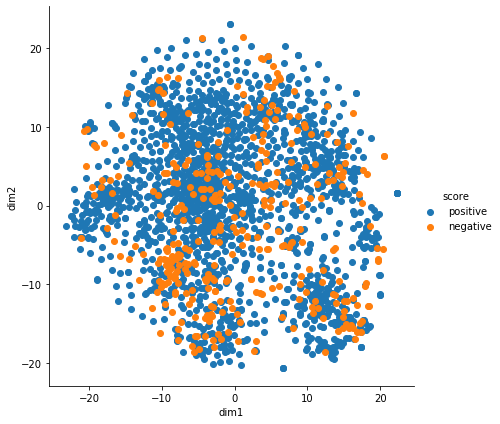

In [49]:
from sklearn.manifold import TSNE
model=TSNE(n_components=2,random_state=0,n_iter=1000,perplexity=30)
tsne_data=model.fit_transform(final_bigram_counts)
tsne_data=np.vstack([tsne_data.T,df['Score']]).T
tsne_df=pd.DataFrame(data=tsne_data,columns=("dim1","dim2","score"))
sns.FacetGrid(tsne_df,hue="score",size=6).map(plt.scatter,'dim1','dim2').add_legend()
plt.show()


In [1]:
final=final.head(2000)
print(final)

NameError: name 'final' is not defined